# import all necessary libraries for the machine learning project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tqdm 
import seaborn as sn
from sklearn import metrics, preprocessing, model_selection

# Download the dataset using kaggle

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d alexteboul/heart-disease-health-indicators-dataset

100% 2.66M/2.66M [00:00<00:00, 5.06MB/s]
100% 2.66M/2.66M [00:00<00:00, 4.32MB/s]


In [4]:
!unzip /content/heart-disease-health-indicators-dataset.zip

Archive:  /content/heart-disease-health-indicators-dataset.zip
  inflating: heart_disease_health_indicators_BRFSS2015.csv  


In [5]:
#read the data
data=pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# prepressing the Dataset 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
# Check whether some values are NaN or not
pd.isna(data).sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
#Dropping columns having a missing values
data.dropna(inplace=True)

In [9]:
pd.isna(data).sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8807a5a430>,
      dtype=object)

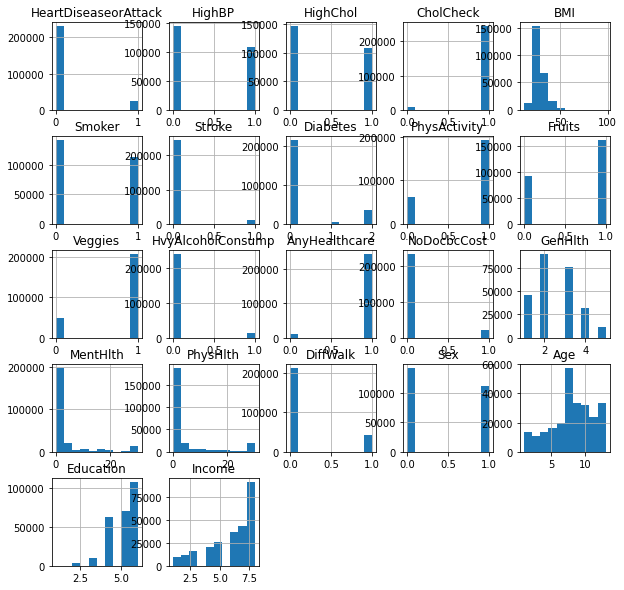

In [10]:
data.hist(figsize=(10,10))

In [11]:
#The describe() method returns description of the data in the DataFrame.
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [12]:
new_dataset = data[data.HeartDiseaseorAttack==1]
new_dataset = new_dataset.append(data[data.HeartDiseaseorAttack==0].sample(len(new_dataset)))

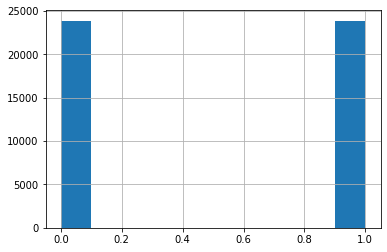

In [13]:
new_dataset.HeartDiseaseorAttack.hist()

In [14]:
# split the data to features and labels 
x=new_dataset.iloc[:,1:]
y=new_dataset.iloc[:,0]

In [15]:
# scale the feature values between 0,1
min_max_preprocess =preprocessing.MinMaxScaler()
min_max_preprocess.fit(x)
x_norm=min_max_preprocess.transform(x)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8806c1cd30>,
      dtype=object)

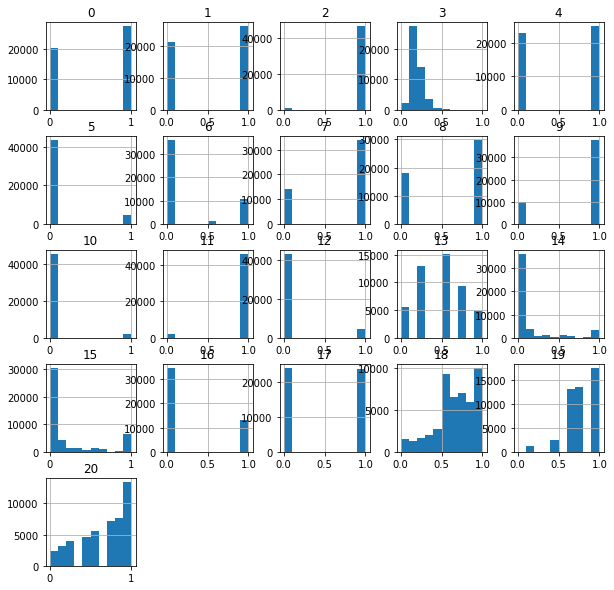

In [16]:
pd.DataFrame(x_norm).hist(figsize=(10,10))

In [17]:
#split the data into a training set and testing set.
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_norm,y,test_size=0.2,random_state=42,stratify=y)

#Create the Data Pipeline

In [18]:
# creat the data pipeline
def data_pipeline(x,y,batch_size=32):
    # insert the data to the data pipeline
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.shuffle(50000)# shuffle the data
    data=data.batch(batch_size)# creat the batch
    data=data.prefetch(tf.data.AUTOTUNE)# run the data processing and training in parallel 
    return data

In [20]:
# create the train pipeline 
train_dataset=data_pipeline(x_train,y_train)
# create the test pipeline
test_dataset=data_pipeline(x_train[-1000:],y_train[-1000:])

In [21]:
# get the first batch of data from the train pipeline 
for x,y in train_dataset.take(1):
    print(x)
    print(y)

tf.Tensor(
[[1.         1.         1.         0.29069767 1.         1.
  1.         0.         0.         0.         0.         1.
  0.         0.75       0.         0.33333333 1.         1.
  1.         0.6        0.71428571]
 [0.         0.         1.         0.1744186  0.         0.
  0.         1.         1.         1.         0.         1.
  0.         0.         0.16666667 0.         0.         0.
  0.08333333 1.         0.71428571]
 [0.         1.         1.         0.1744186  1.         0.
  0.         1.         0.         1.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.91666667 0.8        0.28571429]
 [1.         1.         1.         0.18604651 0.         0.
  0.         1.         1.         1.         0.         1.
  1.         0.         0.06666667 0.         0.         1.
  0.41666667 1.         1.        ]
 [0.         0.         1.         0.1744186  0.         0.
  0.         0.         1.         1.         0.         1.
  0. 

# Model

In [25]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model,self).__init__()
        self.D1=tf.keras.layers.Dense(32,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L1L2())
        self.D2=tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L1L2())
        self.D3=tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L1L2())
        self.D4=tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L1L2())
        self.out=tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
    def call(self,x ):
        x=self.D1(x)
        x=self.D2(x)
        x=self.D3(x)
        x=self.D4(x)
        out = self.out(x)
        return out


In [26]:
model=Model()
model.build(input_shape=(None,21))

In [27]:
# compile the model an using adam optimizer with Categorical crossentropy cost function
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['acc'],
)
# train the model with batch_size=32,for 100 epochs
model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
1195/1195 [==============================] - 4s 3ms/step - loss: 0.4990 - acc: 0.7606 - val_loss: 0.4555 - val_acc: 0.7820
Epoch 2/20
1195/1195 [==============================] - 3s 2ms/step - loss: 0.4826 - acc: 0.7707 - val_loss: 0.4549 - val_acc: 0.7820
Epoch 3/20
1195/1195 [==============================] - 4s 3ms/step - loss: 0.4793 - acc: 0.7739 - val_loss: 0.4437 - val_acc: 0.7930
Epoch 4/20
1195/1195 [==============================] - 3s 2ms/step - loss: 0.4789 - acc: 0.7719 - val_loss: 0.4448 - val_acc: 0.7880
Epoch 5/20
1195/1195 [==============================] - 3s 2ms/step - loss: 0.4785 - acc: 0.7735 - val_loss: 0.4593 - val_acc: 0.7840
Epoch 6/20
1195/1195 [==============================] - 3s 2ms/step - loss: 0.4776 - acc: 0.7746 - val_loss: 0.4495 - val_acc: 0.7860
Epoch 7/20
1195/1195 [==============================] - 3s 2ms/step - loss: 0.4759 - acc: 0.7752 - val_loss: 0.4380 - val_acc: 0.8020
Epoch 8/20
1195/1195 [==============================] - 3s 2ms

# Model Evaluation 

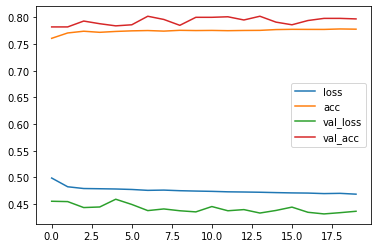

In [28]:
pd.DataFrame(model.history.history).plot()

In [29]:
preds=np.array([])
ys=np.array([])
for x,y in tqdm.tqdm(test_dataset):
    pred = model.predict(x)
    preds=np.append(preds,pred)
  
    ys=np.append(ys,y)

  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 133ms/step


  3%|▎         | 1/32 [00:00<00:05,  5.91it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▎        | 4/32 [00:00<00:02, 13.69it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 6/32 [00:00<00:01, 15.14it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 8/32 [00:00<00:01, 16.31it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███▏      | 10/32 [00:00<00:01, 17.43it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 12/32 [00:00<00:01, 17.43it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 15/32 [00:00<00:00, 18.83it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 17/32 [00:01<00:00, 19.02it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 19/32 [00:01<00:00, 18.75it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 21/32 [00:01<00:00, 18.50it/s]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 23/32 [00:01<00:00, 18.16it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 25/32 [00:01<00:00, 18.58it/s]

1/1 [==============================] - 0s 16ms/step


 84%|████████▍ | 27/32 [00:01<00:00, 18.17it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 30/32 [00:01<00:00, 18.43it/s]

1/1 [==============================] - 0s 70ms/step


100%|██████████| 32/32 [00:01<00:00, 17.03it/s]


In [30]:
 preds = preds>0.5
 preds=preds.astype(int)

accuracy_score: 0.797
precision_score: 0.797425646810349
recall_score: 0.797
f1_score: 0.7970334990533854


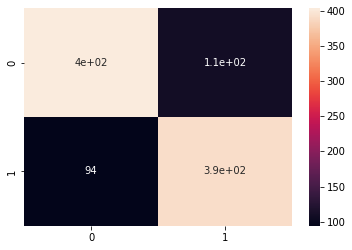

In [31]:
accuracy_score=metrics.accuracy_score(y_true=ys,y_pred=preds)
precision_score=metrics.precision_score(ys,preds,average='weighted')
recall_score=metrics.recall_score(ys,preds,average='weighted')
f1_score=metrics.f1_score(ys,preds,average='weighted')
confion_metrix=metrics.confusion_matrix(ys,preds)
print('accuracy_score:',accuracy_score)
print('precision_score:',precision_score)
print('recall_score:',recall_score)
print('f1_score:',f1_score)

sn.heatmap(confion_metrix,annot=True)
